In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
import numpy as np
import json
%matplotlib inline

In [2]:
df = pd.read_csv("../dane/przetworzone/sumy_laureaty.csv")
df = df.drop("Unnamed: 0", 1)
df = df.drop("id_szkoly", 1)

/usr/local/lib/python3.4/site-packages/pandas/io/parsers.py:1164: DtypeWarning: Columns (2,4,5,8,11,14,17,20,23,26,29,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
df.head()

,plec,rocznik,dysleksja,biologia_laureat,biologia_podstawowa,biologia_rozszerzona,chemia_laureat,chemia_podstawowa,chemia_rozszerzona,fizyka_laureat,...,j_angielski_rozszerzona,j_polski_laureat,j_polski_podstawowa,j_polski_rozszerzona,matematyka_laureat,matematyka_podstawowa,matematyka_rozszerzona,WOS_laureat,WOS_podstawowa,WOS_rozszerzona
0,k,1993,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,k,1994,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,NaN,NaN,10,NaN,NaN,NaN,NaN
2,k,1995,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,25,NaN,NaN,4,NaN,NaN,NaN,NaN
3,k,1993,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,22,NaN,NaN,6,NaN,NaN,NaN,NaN
4,k,1993,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.count()

plec                       307587
rocznik                    302682
dysleksja                  303405
biologia_laureat               84
biologia_podstawowa         26731
biologia_rozszerzona        28369
chemia_laureat                 74
chemia_podstawowa            8394
chemia_rozszerzona          22365
fizyka_laureat                 45
fizyka_podstawowa           12138
fizyka_rozszerzona          12421
geografia_laureat              69
geografia_podstawowa        34759
geografia_rozszerzona       25074
historia_laureat              105
historia_podstawowa          8369
historia_rozszerzona         7651
informatyka_laureat            61
informatyka_podstawowa       2061
informatyka_rozszerzona      2243
j_angielski_laureat            37
j_angielski_podstawowa     275255
j_angielski_rozszerzona     84169
j_polski_laureat              183
j_polski_podstawowa        307656
j_polski_rozszerzona        31864
matematyka_laureat             74
matematyka_podstawowa      337108
matematyka_roz

In [6]:
np.sqrt(df.count())

plec                       554.605265
rocznik                    550.165430
dysleksja                  550.822113
biologia_laureat             9.165151
biologia_podstawowa        163.496177
biologia_rozszerzona       168.430995
chemia_laureat               8.602325
chemia_podstawowa           91.618775
chemia_rozszerzona         149.549323
fizyka_laureat               6.708204
fizyka_podstawowa          110.172592
fizyka_rozszerzona         111.449540
geografia_laureat            8.306624
geografia_podstawowa       186.437657
geografia_rozszerzona      158.347719
historia_laureat            10.246951
historia_podstawowa         91.482239
historia_rozszerzona        87.469995
informatyka_laureat          7.810250
informatyka_podstawowa      45.398238
informatyka_rozszerzona     47.360321
j_angielski_laureat          6.082763
j_angielski_podstawowa     524.647501
j_angielski_rozszerzona    290.118941
j_polski_laureat            13.527749
j_polski_podstawowa        554.667468
j_polski_roz

In [4]:
pd.notnull(df).head().

,plec,rocznik,dysleksja,biologia_laureat,biologia_podstawowa,biologia_rozszerzona,chemia_laureat,chemia_podstawowa,chemia_rozszerzona,fizyka_laureat,...,j_angielski_rozszerzona,j_polski_laureat,j_polski_podstawowa,j_polski_rozszerzona,matematyka_laureat,matematyka_podstawowa,matematyka_rozszerzona,WOS_laureat,WOS_podstawowa,WOS_rozszerzona
0,True,True,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,True,True,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,True,True,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
3,True,True,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,True,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [39]:
przedmioty = [col for col in df if col.endswith("podstawowa") or col.endswith("rozszerzona")]

In [34]:
uczestnictwo = df.loc[:, przedmioty]
uczestnictwo = pd.notnull(uczestnictwo).values.astype(int)

In [35]:
uczestnictwo.shape

(352538, 20)

In [36]:
koincydencje = np.dot(uczestnictwo.transpose(), uczestnictwo)

In [37]:
koincydencje.shape

(20, 20)

In [40]:
df_k = pd.DataFrame(koincydencje, index=przedmioty, columns=przedmioty)

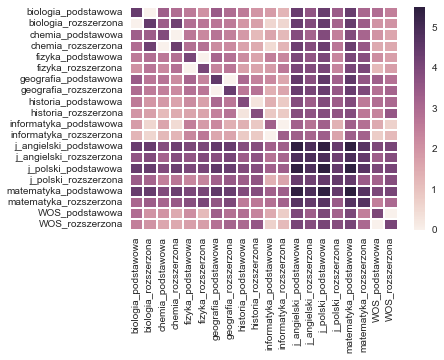

In [41]:
sns.heatmap(np.log10(df_k + 1))

In [44]:
df_p = df_k/df_k.max().max()

In [45]:
df_wzajemna = df_p.copy()

In [57]:
for col in df_wzajemna.columns:
    for row in df_wzajemna.columns:
        if df_p.loc[row, col] == 0:
            df_wzajemna.loc[row, col] = -20
        else:
            df_wzajemna.loc[row, col] = np.log2(df_p.loc[row, col] / (df_p.loc[row, row] * df_p.loc[col, col]))

In [72]:
nodes = []
for col in df_wzajemna.columns:
    nodes.append({"nazwa": col,
                  "liczba": float(df_k.loc[col, col])})

links = []
for i, row in enumerate(df_wzajemna.columns):
    for j, col in enumerate(df_wzajemna.columns):
        if i < j:
            links.append({"source": int(i),
                          "target": int(j),
                          "liczba": float(df_k.loc[row, col]),
                          "oe": float(df_p.loc[row, col] / (df_p.loc[row, row] * df_p.loc[col, col]))})

In [75]:
json.dump({"nodes": nodes, "links": links}, open("../dane/przetworzone/wspolwystepowanie.json", "w"), indent=2)

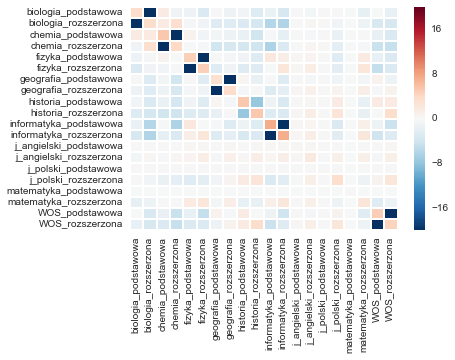

In [59]:
sns.heatmap(df_wzajemna)

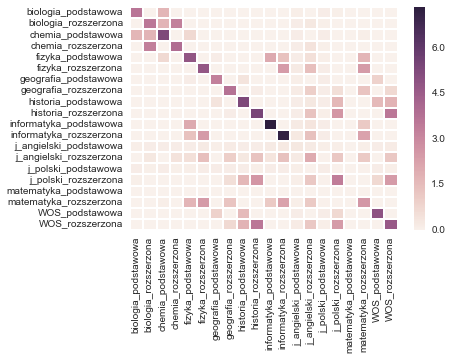

In [60]:
sns.heatmap(df_wzajemna.applymap(lambda x: x if x > 0 else 0))

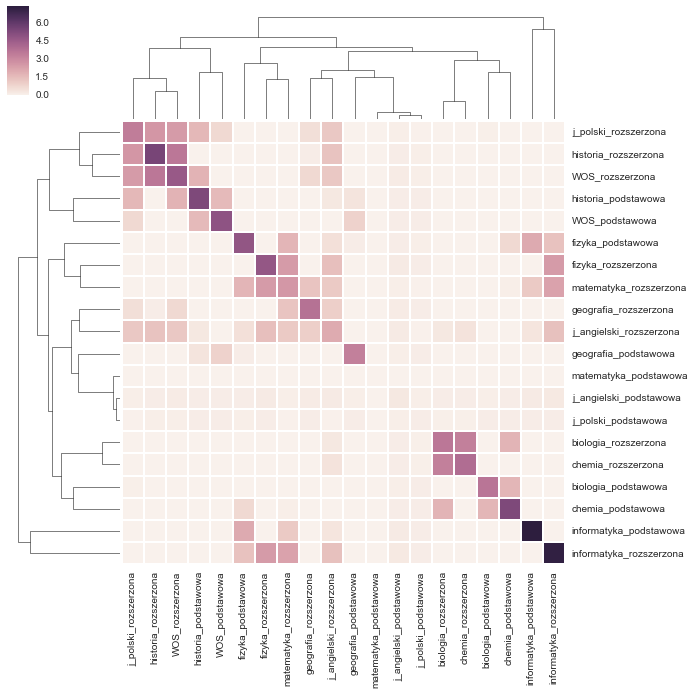

In [55]:
sns.clustermap(df_wzajemna.applymap(lambda x: x if x > 0 else 0))